In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pingouin as pg
%matplotlib inline

In [161]:
shg_df=pd.read_csv('SHG_converted.csv')

In [9]:
shg_df

,Total_no_of_loans,1_source,1_amount,1_1,1_2,1_3,1_4,1_5,1_6,2_source,...,two_wheeler_0,two_wheeler_1,car_0,car_1,smartphone_0,smartphone_1,home_0,home_1,edu_0,edu_1
0,5,3,15000.0,1.0,0.0,0.0,0.0,0.0,0.0,2,...,0,0,0,0,0,0,1,1,1,3
1,3,3,30000.0,0.0,0.0,1.0,0.0,0.0,0.0,2,...,0,0,0,0,0,1,1,1,3,2
2,2,3,30000.0,0.0,0.0,0.0,0.0,0.0,1.0,3,...,1,1,0,0,1,1,1,1,3,2
3,5,2,15000.0,0.0,0.0,1.0,0.0,0.0,0.0,2,...,0,1,0,0,0,0,1,1,1,1
4,3,3,10000.0,0.0,0.0,1.0,0.0,0.0,0.0,3,...,0,0,0,0,0,1,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381,1,3,10000.0,0.0,0.0,1.0,0.0,0.0,0.0,0,...,0,1,0,0,0,0,1,1,3,3
4382,7,3,13850.0,0.0,0.0,0.0,0.0,1.0,0.0,2,...,0,1,0,0,0,1,1,1,2,2
4383,2,3,50000.0,0.0,0.0,0.0,0.0,1.0,0.0,3,...,0,1,0,0,0,1,1,1,3,3
4384,3,3,32000.0,0.0,0.0,0.0,1.0,0.0,0.0,3,...,0,1,0,0,0,1,1,1,1,1


### Caste vs Loan number

In [11]:
shg_df.Total_no_of_loans.describe()

count    4386.000000
mean        1.989056
std         1.757958
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        18.000000
Name: Total_no_of_loans, dtype: float64

In [14]:
shg_df.shape

(4386, 116)

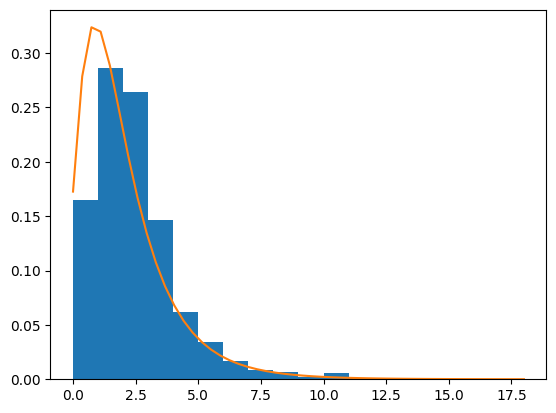

In [41]:
#finding the distribution of total_no_of_loans
plt.hist(shg_df.Total_no_of_loans,bins=18,density=True)
[s_fit,loc_fit,scale_fit]=stats.lognorm.fit(shg_df.Total_no_of_loans)
x=np.linspace(np.min(shg_df.Total_no_of_loans), np.max(shg_df.Total_no_of_loans))
plt.plot(x, stats.lognorm.pdf(x, s_fit, loc_fit, scale_fit))
plt.show()

In [90]:
shg_df.groupby('Total_no_of_loans')[['Total_no_of_loans']].count()

,Total_no_of_loans
Total_no_of_loans,
0,721
1,1257
2,1160
3,644
4,273
5,150
6,73
7,36
8,28


We can see that the column `Total_no_of_loans` is a discrete variable, and not a continuous variable.

<AxesSubplot: xlabel='Caste_Category', ylabel='Total_no_of_loans'>

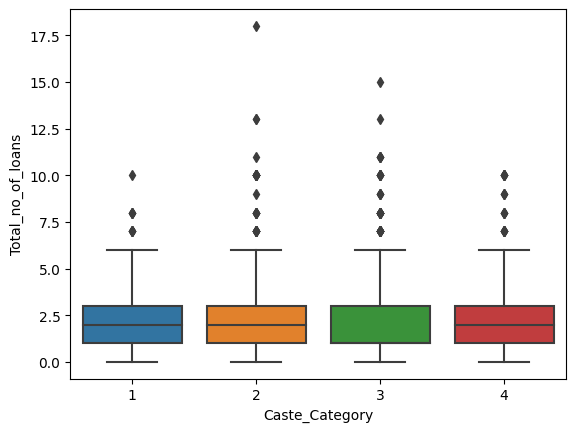

In [35]:
sns.boxplot(x='Caste_Category', y='Total_no_of_loans',data=shg_df)

In [29]:
stats.kruskal(shg_df.Total_no_of_loans,shg_df.Caste_Category)

KruskalResult(statistic=382.16506224088016, pvalue=4.203360623592244e-85)

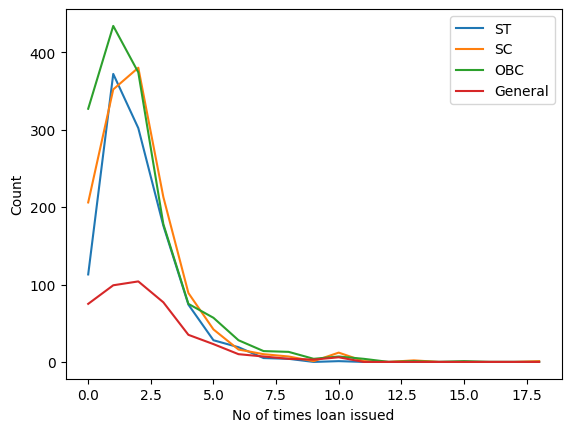

In [88]:
x=np.arange(0,19)
caste1=[113,372,302,176,74,28,19,5,4,0,1,0,0,0,0,0,0,0,0]
caste2=[206,352,380,213,89,42,16,10,7,1,12,1,0,2,0,0,0,0,1]
caste3=[327,434,374,178,75,57,28,14,13,4,7,4,0,1,0,1,0,0,0]
caste4=[75,99,104,77,35,23,10,7,4,3,6,0,0,0,0,0,0,0,0]
plt.plot(x,caste1)
plt.plot(x,caste2)
plt.plot(x,caste3)
plt.plot(x,caste4)
plt.xlabel('No of times loan issued')
plt.ylabel('Count')
plt.legend(['ST','SC','OBC','General'])
plt.show()

### Caste vs Income

In [91]:
stats.kruskal(shg_df.yearly_income,shg_df.Caste_Category)

KruskalResult(statistic=3909.253834296694, pvalue=0.0)

In [92]:
pg.anova(data=shg_df,dv='yearly_income',between='Caste_Category')

,Source,ddof1,ddof2,F,p-unc,np2
0,Caste_Category,3,4382,39.422229,3.939576e-25,0.02628


In [94]:
stats.normaltest(shg_df.Total_no_of_loans)

NormaltestResult(statistic=1835.6309395060698, pvalue=0.0)

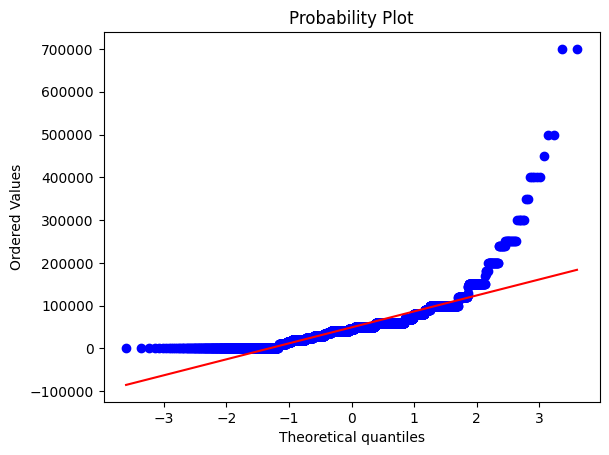

In [97]:
stats.probplot(shg_df.yearly_income, dist="norm", plot=plt)
plt.show()

### Caste vs Total Loan

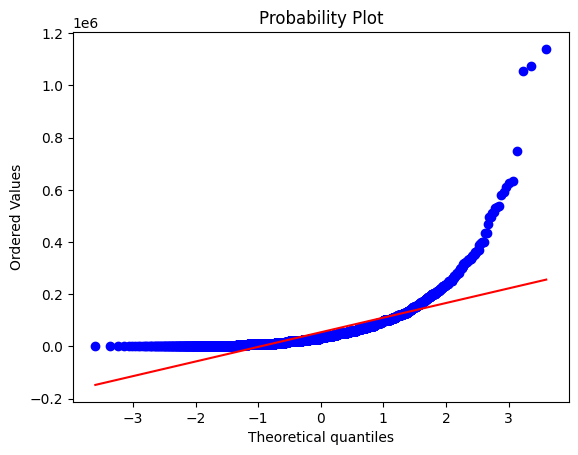

In [148]:
stats.probplot(shg_df.Total_loan_amt, dist="norm",plot=plt)
plt.show()

In [150]:
stats.normaltest(shg_df.Total_loan_amt)

NormaltestResult(statistic=4410.784363754889, pvalue=0.0)

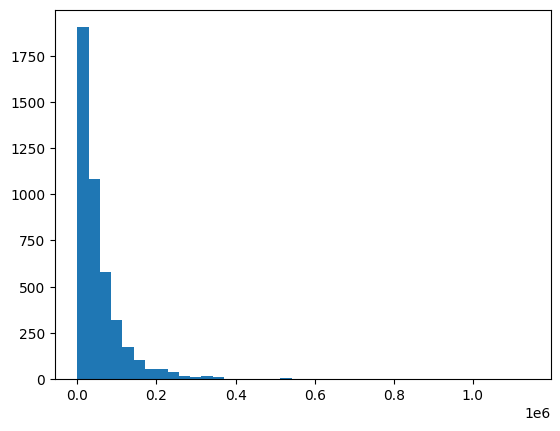

In [156]:
plt.hist(shg_df.Total_loan_amt,bins=40)
plt.show()

### Age vs Total Loan

Relation between these two variables, correlation, scatter plot

<AxesSubplot: xlabel='Total_loan_amt', ylabel='Age'>

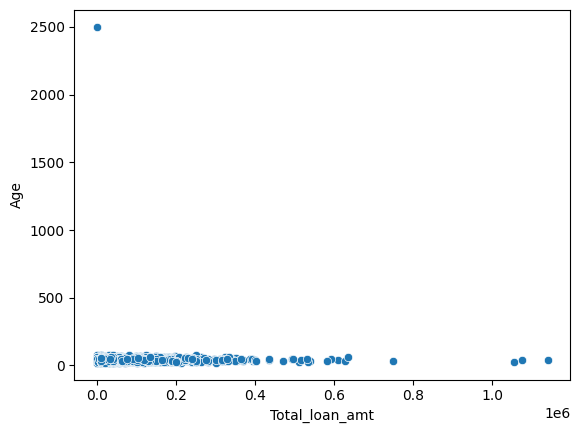

In [162]:
sns.scatterplot(x='Total_loan_amt',y='Age',data=shg_df)

We can see that there is a outlier in the data, which is a typo.

In [163]:
shg_df.Age.describe()

count    4386.000000
mean       41.508436
std        38.517132
min        20.000000
25%        33.000000
50%        40.000000
75%        49.000000
max      2500.000000
Name: Age, dtype: float64

The outlier value is 2500, which is supposed to be 25 yrs.

In [166]:
shg_df.sort_values('Age', ascending=False).head(10)

,Total_no_of_loans,1_source,1_amount,1_1,1_2,1_3,1_4,1_5,1_6,2_source,...,two_wheeler_0,two_wheeler_1,car_0,car_1,smartphone_0,smartphone_1,home_0,home_1,edu_0,edu_1
3526,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0,0,0,0,0,0,1,1,3,3
2404,7,3,39000.0,0.0,0.0,0.0,0.0,1.0,0.0,3,...,1,1,0,0,1,1,1,1,3,3
1911,2,3,24000.0,0.0,0.0,0.0,0.0,0.0,1.0,3,...,0,0,0,0,0,0,1,1,3,3
1199,1,3,10000.0,0.0,0.0,0.0,0.0,0.0,1.0,0,...,0,0,0,0,0,0,0,1,3,3
3949,2,3,50000.0,0.0,0.0,0.0,0.0,1.0,0.0,3,...,0,0,0,0,0,0,0,1,1,1
3157,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,3,3
4230,2,3,30000.0,0.0,0.0,0.0,0.0,1.0,0.0,3,...,0,0,0,0,0,0,0,0,3,3
4096,2,3,10000.0,0.0,1.0,0.0,0.0,0.0,0.0,3,...,0,0,0,0,0,0,1,1,3,3
3034,5,3,30000.0,0.0,0.0,1.0,0.0,0.0,0.0,3,...,0,1,0,0,0,0,0,1,1,3
2154,1,3,10000.0,0.0,0.0,1.0,0.0,0.0,0.0,0,...,0,1,0,0,0,1,0,0,3,3


In [170]:
shg_df['Age'].at[3526]=25

<AxesSubplot: xlabel='Total_loan_amt', ylabel='Age'>

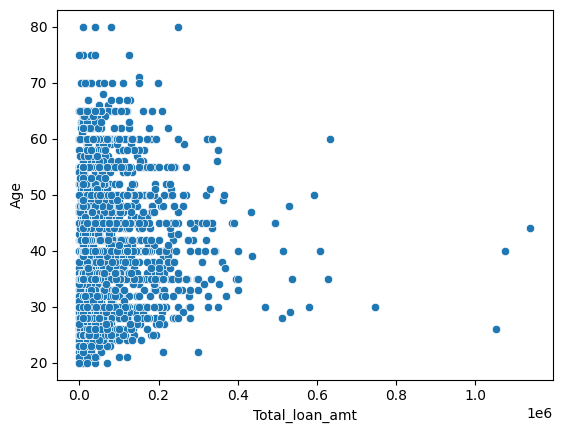

In [171]:
sns.scatterplot(x='Total_loan_amt',y='Age',data=shg_df)

In [172]:
# Calculating Pearson correlation between both the variables
stats.pearsonr(shg_df.Total_loan_amt,shg_df.Age)

PearsonRResult(statistic=0.0043465256759282886, pvalue=0.7735180901795419)

We can see that there is no linear relationship between both the variables.

In [174]:
# Calculating Spearman correlation between both the varibales
stats.spearmanr(shg_df.Total_loan_amt,shg_df.Age)

SignificanceResult(statistic=0.028035517008924496, pvalue=0.0633765461576024)

<AxesSubplot: xlabel='Total_loan_amt', ylabel='Age'>

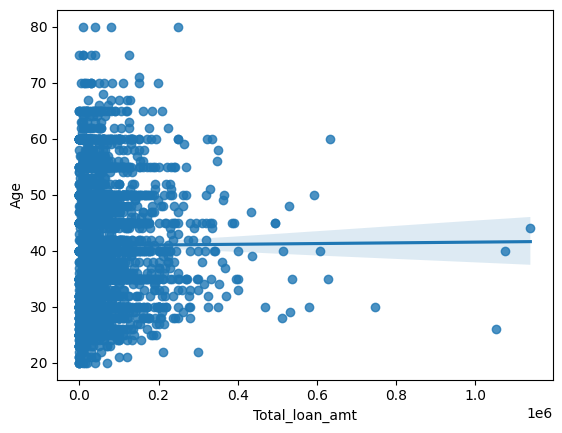

In [179]:
sns.regplot(x='Total_loan_amt',y='Age',data=shg_df)

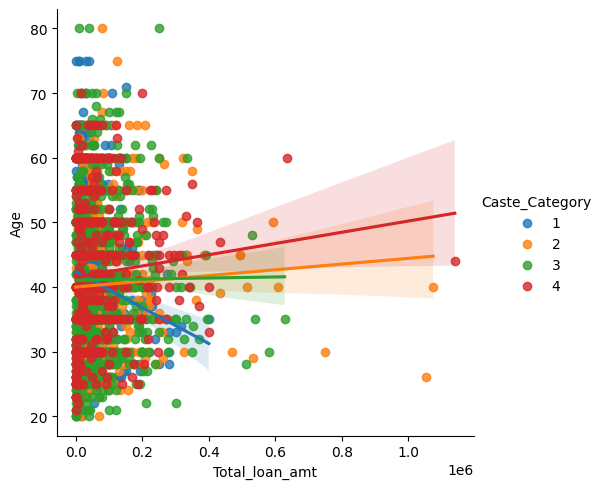

In [177]:
sns.lmplot(x='Total_loan_amt',y='Age',data=shg_df,hue='Caste_Category')